In [11]:
#import the necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#connect to dataframe

Stocks = pd.read_excel('/content/CAPSTOCKS.xlsx')
Stocks.head(40)

,Date,Close
0,2014-01-02 16:59:59.712,20950.0
1,2014-01-03 16:59:59.712,20704.0
2,2014-01-06 16:59:59.712,20340.0
3,2014-01-07 16:59:59.712,20900.0
4,2014-01-08 16:59:59.712,20700.0
5,2014-01-09 16:59:59.712,20670.0
6,2014-01-10 16:59:59.712,20300.0
7,2014-01-13 16:59:59.712,20400.0
8,2014-01-14 16:59:59.712,20360.0
9,2014-01-15 16:59:59.712,20600.0


In [14]:
Stocks['SMA'] = Stocks['Close'].rolling(window=10).mean()
Stocks.head(40)

,Date,Close,SMA
0,2014-01-02 16:59:59.712,20950.0,NaN
1,2014-01-03 16:59:59.712,20704.0,NaN
2,2014-01-06 16:59:59.712,20340.0,NaN
3,2014-01-07 16:59:59.712,20900.0,NaN
4,2014-01-08 16:59:59.712,20700.0,NaN
5,2014-01-09 16:59:59.712,20670.0,NaN
6,2014-01-10 16:59:59.712,20300.0,NaN
7,2014-01-13 16:59:59.712,20400.0,NaN
8,2014-01-14 16:59:59.712,20360.0,NaN
9,2014-01-15 16:59:59.712,20600.0,20592.4


In [15]:
#rolling window to calculate
Stocks['LMA'] = Stocks['Close'].rolling(window = 30).mean()
Stocks.head(40)

,Date,Close,SMA,LMA
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN
1,2014-01-03 16:59:59.712,20704.0,NaN,NaN
2,2014-01-06 16:59:59.712,20340.0,NaN,NaN
3,2014-01-07 16:59:59.712,20900.0,NaN,NaN
4,2014-01-08 16:59:59.712,20700.0,NaN,NaN
5,2014-01-09 16:59:59.712,20670.0,NaN,NaN
6,2014-01-10 16:59:59.712,20300.0,NaN,NaN
7,2014-01-13 16:59:59.712,20400.0,NaN,NaN
8,2014-01-14 16:59:59.712,20360.0,NaN,NaN
9,2014-01-15 16:59:59.712,20600.0,20592.4,NaN


In [16]:

n = 10
#calculate the 10 period ROC
Stocks['ROC'] = ((Stocks['Close']- Stocks['Close'].shift(n))/Stocks['Close'].shift(n))*100
#Calculate the short term SMA of the 10-period ROC
Stocks['RCMA1'] = Stocks['ROC'].rolling(window=10).mean()
#Display the result

print(Stocks[['Close','ROC','RCMA1']].tail(20))



         Close       ROC     RCMA1
2477  196037.0 -1.492905  4.050165
2478  196071.0  0.384497  2.967064
2479  195443.0 -0.172132  2.395446
2480  194316.0 -1.055558  1.843666
2481  191972.0 -3.250648  0.936095
2482  195267.0 -0.997795  0.514307
2483  194823.0 -0.739273  0.061004
2484  193281.0 -3.359500 -0.708404
2485  194014.0 -1.701854 -1.136368
2486  190049.0 -3.771197 -1.615636
2487  189992.0 -3.083602 -1.774706
2488  195878.0 -0.098434 -1.822999
2489  188886.0 -3.354942 -2.141280
2490  189734.0 -2.358015 -2.271526
2491  191588.0 -0.200029 -1.966464
2492  192544.0 -1.394501 -2.006135
2493  198500.0  1.887354 -1.743472
2494  199796.0  3.370740 -1.070448
2495  200505.0  3.345635 -0.565699
2496  202636.0  6.623029  0.473724


In [17]:
n = 15
#calculate the 10 period ROC
Stocks['ROC'] = ((Stocks['Close']- Stocks['Close'].shift(n))/Stocks['Close'].shift(n))*100
#Calculate the short term SMA of the 10-period ROC
Stocks['RCMA2'] = Stocks['ROC'].rolling(window=10).mean()
#Display the result

print(Stocks[['Close','ROC','RCMA2']].tail(20))

         Close       ROC      RCMA2
2477  196037.0  2.593128  12.726927
2478  196071.0  3.686409  11.313120
2479  195443.0  1.957317   9.569518
2480  194316.0  0.989018   7.782264
2481  191972.0 -1.804604   5.611762
2482  195267.0 -1.879824   3.543656
2483  194823.0 -0.254454   2.342340
2484  193281.0 -1.276433   1.432793
2485  194014.0 -1.209335   0.813296
2486  190049.0 -4.219794  -0.141857
2487  189992.0 -3.672269  -0.768397
2488  195878.0 -0.201759  -1.157214
2489  188886.0 -5.557000  -1.908645
2490  189734.0 -3.870337  -2.394581
2491  191588.0 -2.991944  -2.513315
2492  192544.0 -1.781806  -2.503513
2493  198500.0  1.238837  -2.354184
2494  199796.0  2.227248  -2.003816
2495  200505.0  3.185018  -1.564381
2496  202636.0  5.554977  -0.586904


In [18]:
n = 20
#calculate the 10 period ROC
Stocks['ROC'] = ((Stocks['Close']- Stocks['Close'].shift(n))/Stocks['Close'].shift(n))*100
#Calculate the short term SMA of the 10-period ROC
Stocks['RCMA3'] = Stocks['ROC'].rolling(window=10).mean()
#Display the result

print(Stocks[['Close','ROC','RCMA3']].tail(20))

         Close        ROC      RCMA3
2477  196037.0  18.079641  17.952945
2478  196071.0  11.643122  17.719564
2479  195443.0   5.362380  16.504301
2480  194316.0   3.359574  15.193419
2481  191972.0   2.385067  13.704857
2482  195267.0   2.190159  12.218532
2483  194823.0   3.026441  10.681179
2484  193281.0   0.829460   8.567441
2485  194014.0   0.832064   6.704937
2486  190049.0  -2.788235   4.491967
2487  189992.0  -4.530471   2.230956
2488  195878.0   0.285685   1.095212
2489  188886.0  -3.521299   0.206844
2490  189734.0  -3.388683  -0.467981
2491  191588.0  -3.444175  -1.050905
2492  192544.0  -2.378381  -1.507759
2493  198500.0   1.134129  -1.696991
2494  199796.0  -0.102000  -1.790137
2495  200505.0   1.586843  -1.714659
2496  202636.0   2.602065  -1.175629


In [19]:
n = 30
#calculate the 10 period ROC
Stocks['ROC'] = ((Stocks['Close']- Stocks['Close'].shift(n))/Stocks['Close'].shift(n))*100
#Calculate the short term SMA of the 10-period ROC
Stocks['RCMA4'] = Stocks['ROC'].rolling(window=15).mean()
#Display the result

print(Stocks[['Close','ROC','RCMA4']].tail(20))

         Close        ROC      RCMA4
2477  196037.0  13.284753  11.369566
2478  196071.0  14.415177  11.799523
2479  195443.0  17.312725  12.174600
2480  194316.0  15.238999  12.302215
2481  191972.0  13.458629  12.336018
2482  195267.0  15.885460  12.432327
2483  194823.0  17.524672  12.825353
2484  193281.0  17.869361  13.334004
2485  194014.0  17.424119  13.806886
2486  190049.0  14.840866  14.258078
2487  189992.0  14.438535  14.622753
2488  195878.0  11.533227  14.732895
2489  188886.0   1.827533  13.931581
2490  189734.0   0.922340  13.195193
2491  191588.0   2.180267  12.543778
2492  192544.0   0.765117  11.709135
2493  198500.0   4.970915  11.079518
2494  199796.0   4.228159  10.207213
2495  200505.0   4.205537   9.471649
2496  202636.0   3.650128   8.817749


In [20]:
Stocks['KST'] = (Stocks['RCMA1'] * 1 ) + (Stocks['RCMA2'] * 2) + (Stocks['RCMA3'] * 3) + (Stocks['RCMA4'] * 4)

In [21]:
n = 9

Stocks['Signal line']= Stocks['KST'].rolling(window=9).mean()

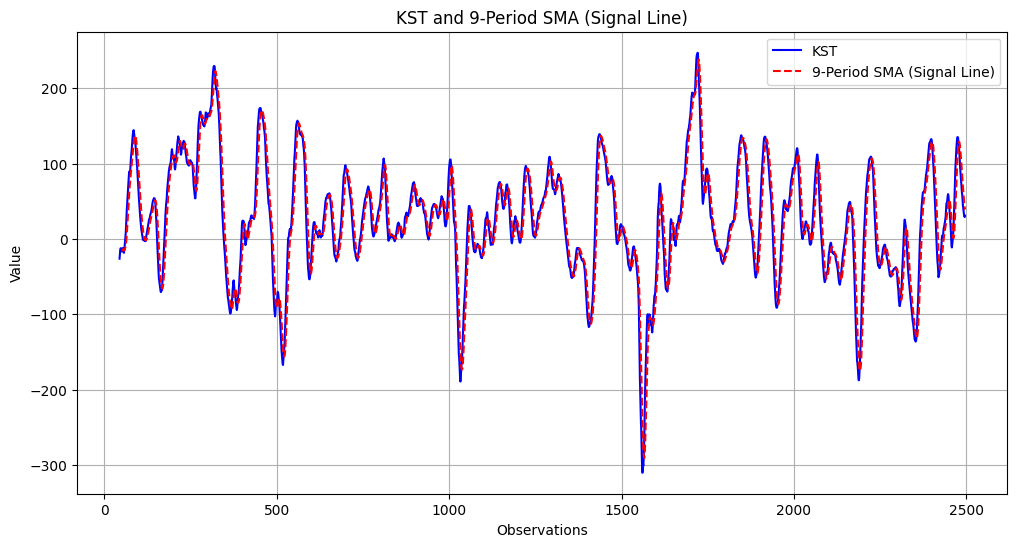

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(Stocks['KST'], label='KST', color='blue')
plt.plot(Stocks['Signal line'], label='9-Period SMA (Signal Line)', color='red', linestyle='--')
plt.title('KST and 9-Period SMA (Signal Line)')
plt.xlabel('Observations')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
KST_Mean = Stocks['KST'].rolling(window=10).mean()

#Buy signal when KST is significanlty below the mean

Stocks['Signal'] = 0
Stocks.loc[(Stocks['KST'] < KST_Mean) & (Stocks['KST'].shift(1) > KST_Mean - 10 ), 'Signal'] = 1

#Sell signal when KST is significantly above the mean
Stocks.loc[(Stocks['KST'] > KST_Mean) & (Stocks['KST'].shift(1) < KST_Mean + 10), 'Signal'] = -1
Stocks.head(40)

,Date,Close,SMA,LMA,ROC,RCMA1,RCMA2,RCMA3,RCMA4,KST,Signal line,Signal
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2014-01-03 16:59:59.712,20704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2014-01-06 16:59:59.712,20340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2014-01-07 16:59:59.712,20900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2014-01-08 16:59:59.712,20700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2014-01-09 16:59:59.712,20670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,2014-01-10 16:59:59.712,20300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,2014-01-13 16:59:59.712,20400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,2014-01-14 16:59:59.712,20360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,2014-01-15 16:59:59.712,20600.0,20592.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
for i in range(len(Stocks)-2,28,-1):
    if Stocks.loc[i+1, 'Signal'] == Stocks.loc[i, 'Signal']:
        Stocks.loc[i+1, 'Signal'] = 0

Stocks.loc[29,'Signal']=0
Stocks.head(350)

,Date,Close,SMA,LMA,ROC,RCMA1,RCMA2,RCMA3,RCMA4,KST,Signal line,Signal
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2014-01-03 16:59:59.712,20704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2014-01-06 16:59:59.712,20340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2014-01-07 16:59:59.712,20900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2014-01-08 16:59:59.712,20700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,2015-05-22 16:59:59.712,53499.0,53029.6,54262.066667,-1.019426,-4.740063,-4.815672,-1.829281,7.323798,9.435943,53.857384,0
346,2015-05-25 16:59:59.712,53681.0,52997.7,54235.433333,-1.466593,-4.262694,-5.406632,-2.333523,5.992833,1.894803,42.056405,0
347,2015-05-26 16:59:59.712,53280.0,52925.7,54221.200000,-0.795055,-3.803692,-6.027950,-3.105849,4.710260,-6.336097,30.931704,0
348,2015-05-27 16:59:59.712,51800.0,52908.0,54181.200000,-2.264151,-2.895339,-5.972421,-3.886081,3.566409,-12.232788,20.770428,0


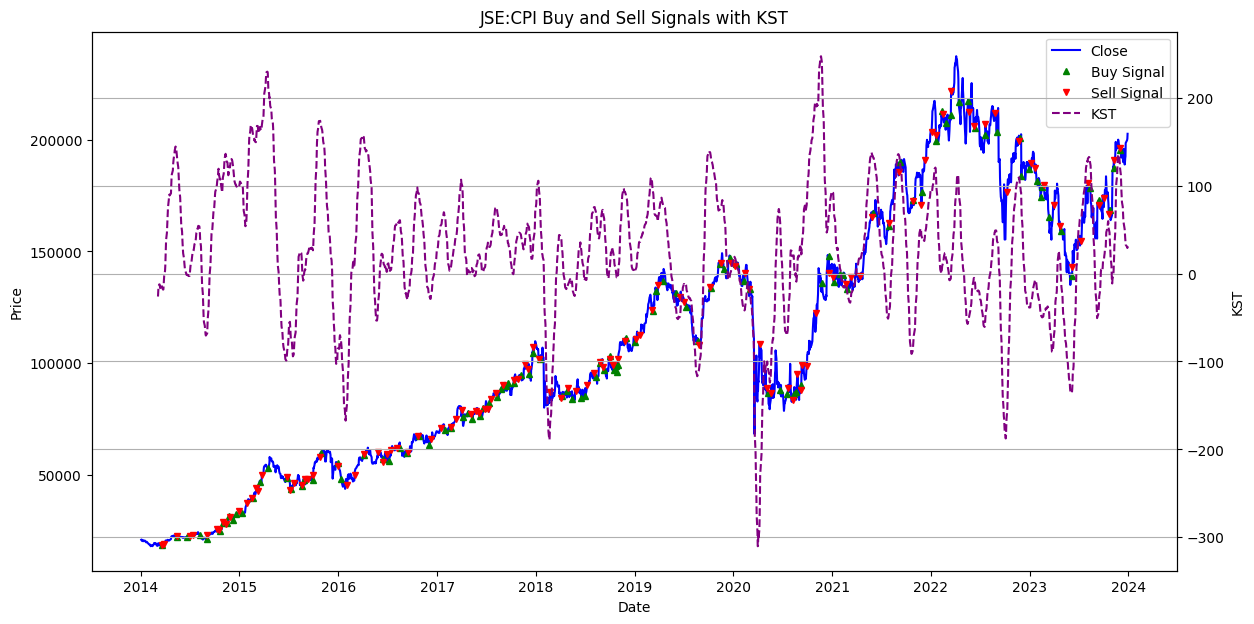

In [24]:
plt.figure(figsize=(14, 7))

# Plotting the Close prices
plt.plot(Stocks['Date'], Stocks['Close'], label='Close', color='blue')

# Plotting Buy Signals
plt.plot(Stocks[Stocks['Signal'] == 1]['Date'],
         Stocks[Stocks['Signal'] == 1]['Close'],
         '^', markersize=5, color='green', label='Buy Signal')

# Plotting Sell Signals
plt.plot(Stocks[Stocks['Signal'] == -1]['Date'],
         Stocks[Stocks['Signal'] == -1]['Close'],
         'v', markersize=5, color='red', label='Sell Signal')

# Adding a secondary y-axis for the KST
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plotting the KST
ax2.plot(Stocks['Date'], Stocks['KST'], label='KST', color='purple', linestyle='--')

# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('KST')

plt.title('JSE:CPI Buy and Sell Signals with KST')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.grid(True)
plt.show()

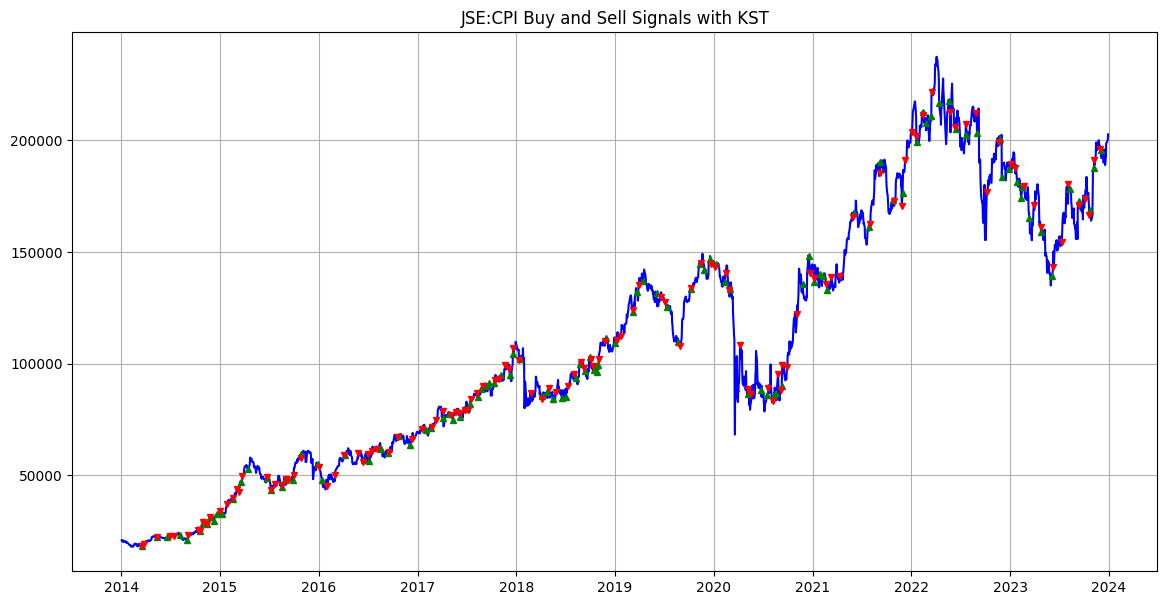

In [25]:
plt.figure(figsize=(14, 7))

# Plotting the Close prices
plt.plot(Stocks['Date'], Stocks['Close'], label='Close', color='blue')

# Plotting Buy Signals
plt.plot(Stocks[Stocks['Signal'] == 1]['Date'],
         Stocks[Stocks['Signal'] == 1]['Close'],
         '^', markersize=5, color='green', label='Buy Signal')

# Plotting Sell Signals
plt.plot(Stocks[Stocks['Signal'] == -1]['Date'],
         Stocks[Stocks['Signal'] == -1]['Close'],
         'v', markersize=5, color='red', label='Sell Signal')





# Setting labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')


plt.title('JSE:CPI Buy and Sell Signals with KST')

# Combining legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

plt.grid(True)
plt.show()


In [26]:
def backtest_strategy(Stocks, signal_column):
    total_returns = 0
    total_trades = 0
    holding_position = False

    for i in range(len(Stocks)):
        signal = Stocks[signal_column].iloc[i]
        close_price = Stocks['Close'].iloc[i]

        if signal == 1 and not holding_position:  # Buy signal
            buy_price = close_price
            holding_position = True

        elif signal == 0 and holding_position:  # Sell signal
            sell_price = close_price
            # Calculate percentage return from the trade
            trade_return = (sell_price - buy_price) / buy_price
            total_returns += trade_return
            total_trades += 1
            holding_position = False  # Reset position

    # This line was incorrectly indented
    total_returns_percentage = total_returns * 100
    return total_returns_percentage, total_trades

backtest_strategy(Stocks, 'Signal')


(17.006226295083593, 115)

In [33]:
Stocks['returns'] = Stocks['Close'].pct_change()
Stocks.head(40)

,Date,Close,SMA,LMA,ROC,RCMA1,RCMA2,RCMA3,RCMA4,KST,Signal line,Signal,returns
0,2014-01-02 16:59:59.712,20950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2014-01-03 16:59:59.712,20704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.011742
2,2014-01-06 16:59:59.712,20340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.017581
3,2014-01-07 16:59:59.712,20900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.027532
4,2014-01-08 16:59:59.712,20700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.009569
5,2014-01-09 16:59:59.712,20670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.001449
6,2014-01-10 16:59:59.712,20300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.017900
7,2014-01-13 16:59:59.712,20400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.004926
8,2014-01-14 16:59:59.712,20360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.001961
9,2014-01-15 16:59:59.712,20600.0,20592.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.011788


In [32]:
!pip install scikit-learn #Install the necessary package
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

def generate_confusion_matrix(Stocks):
    signals = ['Signal']
    df = Stocks.copy()
    confusion_matrices = {}
    for signal in signals:
        cm = confusion_matrix(Stocks['returns_label'], Stocks[signal])
        confusion_matrices[signal] = cm
        print(f"\nConfusion Matrix for {signal}:\n", cm)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for {signal}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


    return confusion_matrices

generate_confusion_matrix(Stocks)

KeyError: 'returns_label'